In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('titanic_train.csv')
test=pd.read_csv('titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
group=train.groupby('Pclass')['Survived'].sum()
group

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [9]:
pd.crosstab(train['Survived'],train['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [10]:
corr=train.corr()

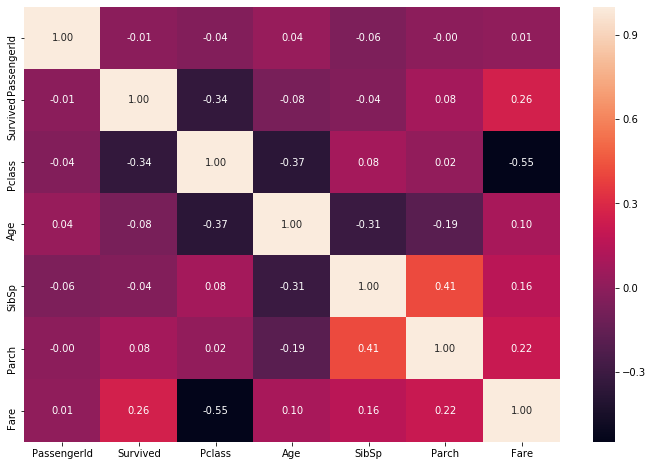

In [11]:
plt.rcParams['figure.figsize']=(12,8)
sns.heatmap(corr,annot=True,fmt='.2f')

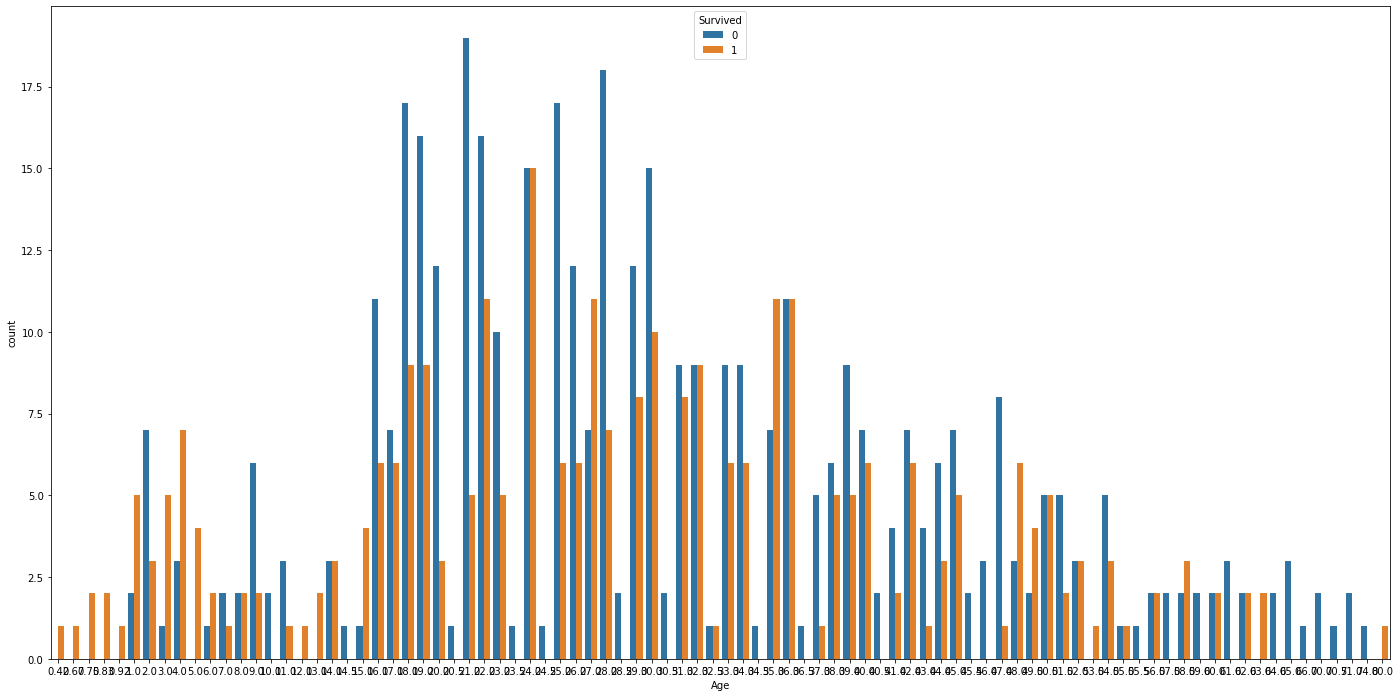

In [12]:
color=['red' if 'Survived'==0 else 'green']
plt.rcParams['figure.figsize']=(24,12)
sns.countplot(x='Age',hue='Survived',data=train)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12348d550>,
      dtype=object)

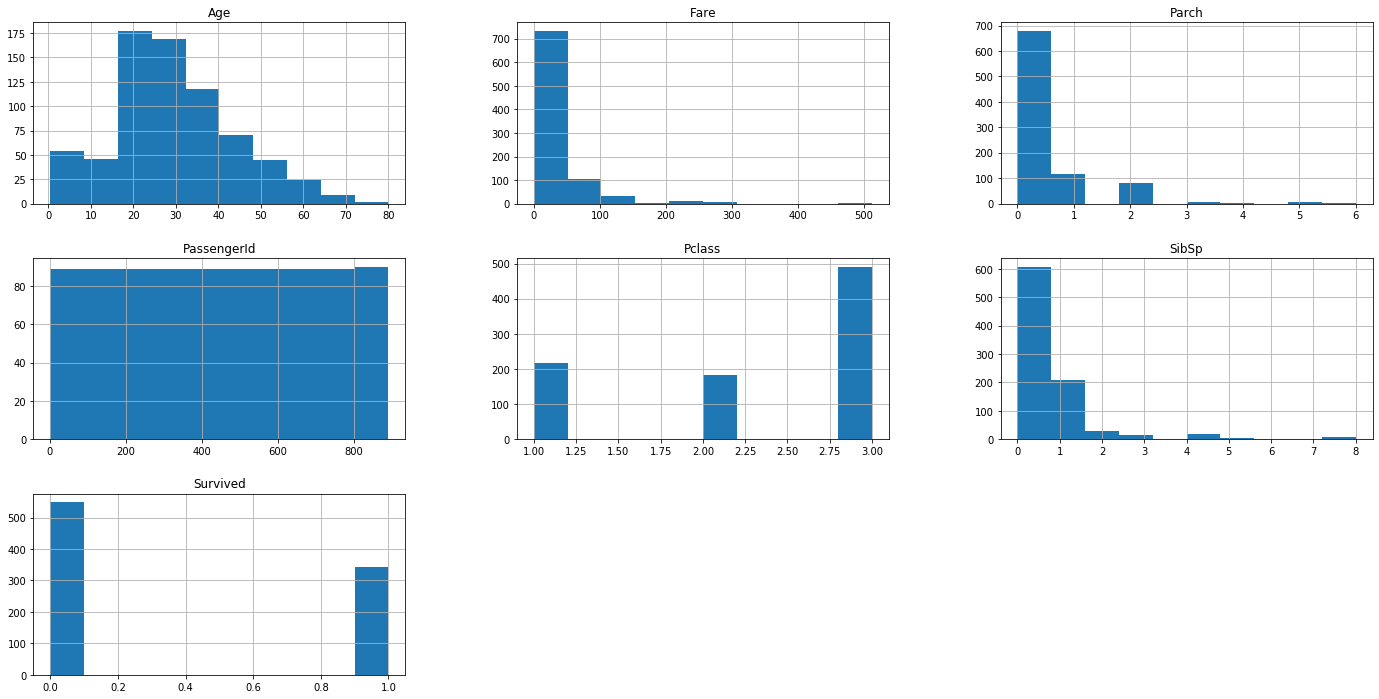

In [13]:
train.hist()

In [14]:
pd.crosstab(train['Embarked'],train['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


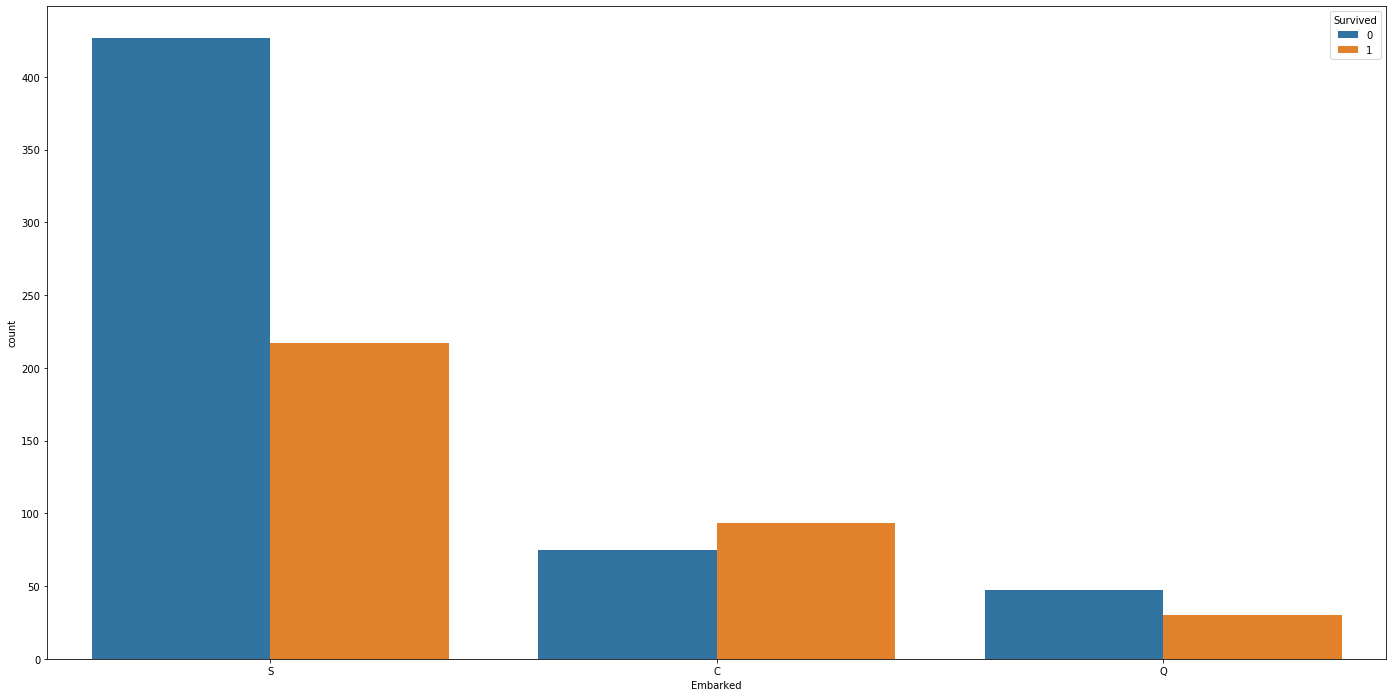

In [15]:
sns.countplot(x='Embarked',hue='Survived',data=train);       

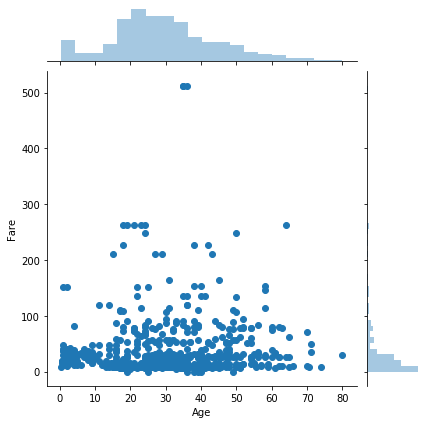

In [16]:
sns.jointplot(x='Age',y='Fare',data=train)

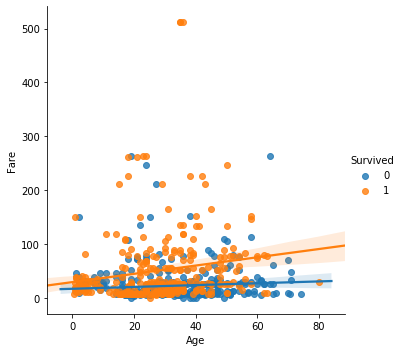

In [17]:
sns.lmplot('Age','Fare',hue='Survived',data=train)

In [18]:
train_df=train.drop(['Cabin'],axis=1)

In [19]:
val=np.median(train_df['Fare'])

In [20]:
train_df['Fare']=train_df['Fare'].fillna(val)

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [22]:
train_df['Embarked']=train_df['Embarked'].fillna('S')

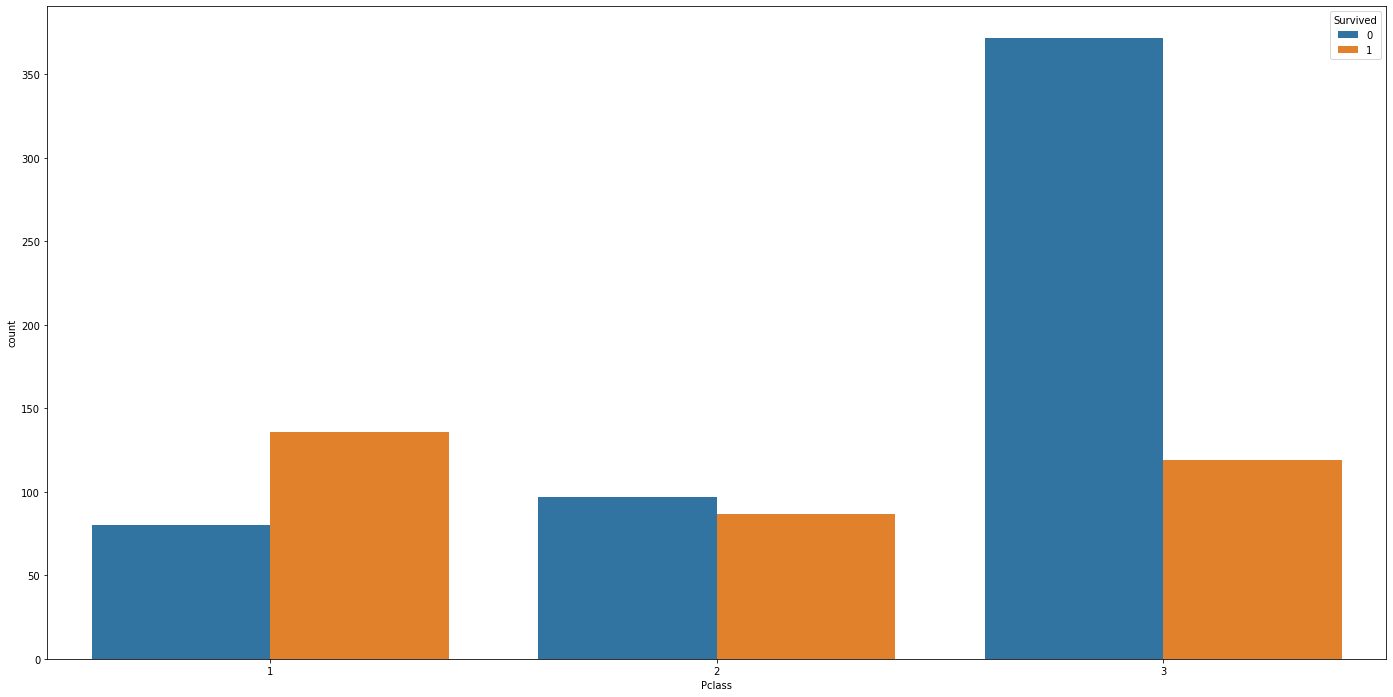

In [23]:
sns.countplot(x='Pclass',hue='Survived',data=train_df)

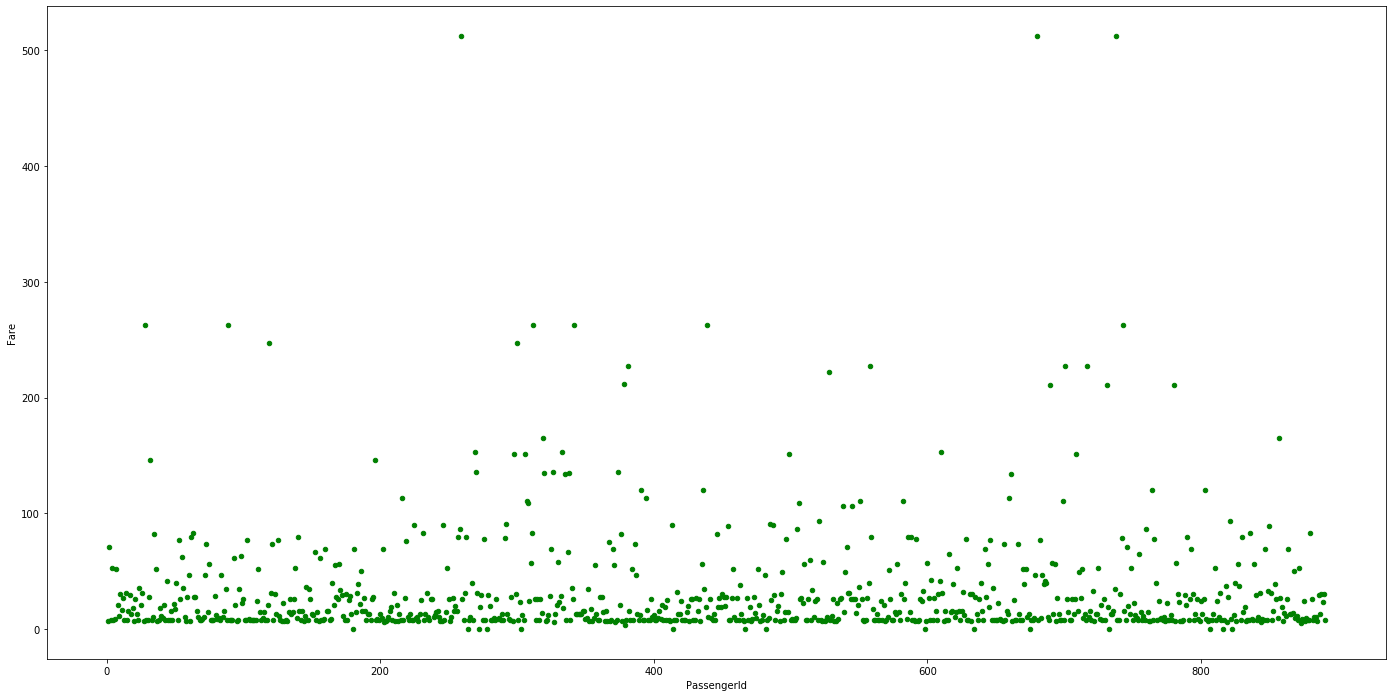

In [24]:
color=['red' if 'Survived'=='0' else 'green']
train_df.plot(y='Fare',x='PassengerId',kind='scatter',c=color)

In [25]:
len(train_df[train_df['Fare']>400])

3

In [26]:
train_df[train_df['Fare']>400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [27]:
#dropping outliers in 'Fare'
train_df= train_df.drop([258,679,737])

In [28]:
train_df.shape

(888, 11)

In [29]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [30]:
train_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [31]:
train_df.shape

(888, 8)

In [32]:
train_df['Sex']=train_df['Sex'].map({'male':1,'female':0})

In [33]:
train_df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.25,S


In [34]:
train_df.drop(['Embarked'],axis=1,inplace=True)

In [35]:
train_df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.25


In [36]:
columns=pd.get_dummies(train['Embarked'])


In [37]:
columns=columns.drop([258,679,737])

In [38]:
columns.shape

(888, 3)

In [39]:
train_df=pd.concat([train_df,columns],axis=1)
train_df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.25,0,0,1


In [40]:
train_df['Age']=train_df['Age'].fillna(24.0)

In [41]:
X=train_df.loc[:,train_df.columns!='Survived']
y=train_df.loc[:,'Survived']

In [42]:
X.shape,y.shape

((888, 9), (888,))

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=13)

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 10 columns):
Survived    888 non-null int64
Pclass      888 non-null int64
Sex         888 non-null int64
Age         888 non-null float64
SibSp       888 non-null int64
Parch       888 non-null int64
Fare        888 non-null float64
C           888 non-null uint8
Q           888 non-null uint8
S           888 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.1 KB


## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
reg=LogisticRegression()
reg.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
prediction=reg.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
print('the accuracy of logistic regression is {}'.format(accuracy_score(y_test,prediction)))

the accuracy of logistic regression is 0.7715355805243446


In [49]:
reg.score(X_train,y_train)

0.8083735909822867

In [50]:
reg.coef_

array([[-8.26550105e-01, -2.61950137e+00, -2.73753843e-02,
        -3.79772114e-01,  2.02642018e-02,  1.50264176e-03,
         1.00465228e+00,  7.92845496e-01,  7.51997771e-01]])

In [52]:
from sklearn.model_selection import GridSearchCV
penalty=['l1','l2']
C=[0.001,0.01,0.1,0.5,1,4]
hyperparameters=dict(C=C,penalty=penalty)
grid=GridSearchCV(estimator=reg,param_grid=hyperparameters,cv=4)


In [53]:
best_reg=grid.fit(X_train,y_train)

In [54]:
best_reg.predict(X_test)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1])

In [55]:
print('best parameters are.format{}'.format(best_reg.best_estimator_))

best parameters are.formatLogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [56]:
best_reg.best_params_

{'C': 0.5, 'penalty': 'l1'}

In [57]:
best_reg.best_score_

0.8083735909822867

In [58]:
best_reg.best_index_

6

In [103]:
from sklearn.metrics import roc_curve,confusion_matrix,classification_report

In [110]:
cm=confusion_matrix(y_test,prediction)
clr=classification_report(y_test,prediction)
print('confusion_matrix\n',cm)
print('claassification_report\n',clr)

confusion_matrix
 [[131  30]
 [ 31  75]]
claassification_report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       161
           1       0.71      0.71      0.71       106

    accuracy                           0.77       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.77      0.77      0.77       267



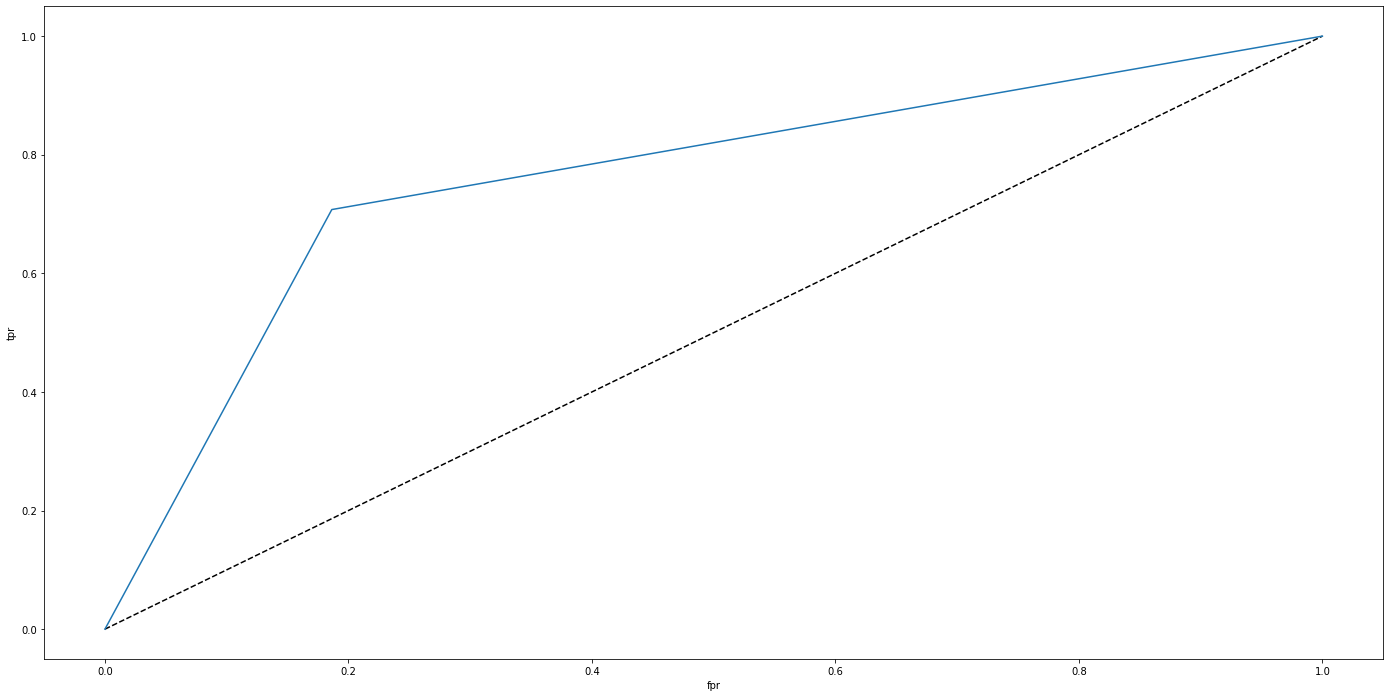

In [117]:
fpr,tpr,t=roc_curve(y_test,prediction)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()


## Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
rf_pred=rf.predict(X_test)

In [73]:
rf.score(X_train,y_train)

0.9822866344605475

In [74]:
rf.score(X_test,y_test)

0.8052434456928839

In [80]:
max_depth=[8,10,15,20,30]
min_samples_leaf=[2,3,4,5,8]
estimators=[50,100,120,150]
hyperparameters=dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf)
rf_grid=GridSearchCV(rf,param_grid=hyperparameters,cv=5,verbose=0)

In [81]:
best_rf=rf_grid.fit(X_train,y_train)

/Users/shivaganesh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [83]:
best_rf_pred=best_rf.predict(X_test)

In [84]:
accuracy_score(y_test,best_rf_pred)

0.8127340823970037

In [85]:
best_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
best_rf.best_params_

{'max_depth': 15, 'min_samples_leaf': 3}

In [87]:
best_rf.best_score_

0.8276972624798712

In [89]:
rf2=RandomForestClassifier(max_depth=15,min_samples_leaf=3)
rf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
rf_pred=rf2.predict(X_test)

In [91]:
accuracy_score(y_test,rf_pred)

0.8014981273408239

In [92]:
rf2.score(X_train,y_train)

0.8824476650563607

In [97]:
params={'max_depth':np.arange(2,10),'min_samples_leaf':np.arange(2,10)}
randomforest=RandomForestClassifier()
best_rf2=GridSearchCV(randomforest,param_grid=params,verbose=0,cv=5)
best_rf2.fit(X_train,y_train)

/Users/shivaganesh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [98]:
best_pred=best_rf2.predict(X_test)

In [99]:
accuracy_score(y_test,best_pred)

0.8164794007490637

In [100]:
best_rf2.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [101]:
best_rf2.best_params_

{'max_depth': 4, 'min_samples_leaf': 2}

In [102]:
best_rf2.best_score_

0.8293075684380032

## Ridge and Lasso

In [118]:
from sklearn.linear_model import Ridge,Lasso

In [121]:
train=[]
test=[]
for i in [0.00001,0.001,0.1,0.5,0.8,1,10]:
    rg=Ridge(alpha=i)
    rg.fit(X_train,y_train)
    train.append(rg.score(X_train,y_train))
    test.append(rg.score(X_test,y_test))
print('training accuracy is ',train)
print('test accuracy is',test)

training accuracy is  [0.4054766568654199, 0.40547665627591745, 0.40547217618062803, 0.4054267074573147, 0.4053924016413617, 0.4053713319130766, 0.40383417710505454]
test accuracy is [0.3608595869608716, 0.3608605940430215, 0.36095930058600834, 0.3613339996205226, 0.36160140703218124, 0.3617755784915664, 0.36778161695880607]


In [122]:
train2=[]
test2=[]
for i in [0.00001,0.001,0.1,0.5,0.8,1,10]:
    rg=Lasso(alpha=i)
    rg.fit(X_train,y_train)
    train2.append(rg.score(X_train,y_train))
    test2.append(rg.score(X_test,y_test))
print('training accuracy is ',train2)
print('test accuracy is',test2)

training accuracy is  [0.40547541437972956, 0.4051893304419991, 0.12877345851170863, 0.044489518376686465, 0.04327038415806561, 0.04231096390343081, 0.0]
test accuracy is [0.3608842571229669, 0.36223996146149307, 0.18330334373806834, 0.10550380794694858, 0.09947830796215229, 0.09527958776453027, -0.001985645251816104]


## SVM using pipeline

In [124]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [127]:
steps=[('standard',StandardScaler()),('SVM',SVC())]
pipeline=Pipeline(steps)
params={'SVM__C':[0.1,1,10,100],'SVM__gamma':[0.001,0.01,0.1,1]}
model=GridSearchCV(pipeline,param_grid=params,cv=3)
model.fit(X_train,y_train)
svm_pred=model.predict(X_test)

In [128]:
print(model.best_params_)

{'SVM__C': 100, 'SVM__gamma': 0.01}


In [129]:
print(accuracy_score(svm_pred,y_test))

0.7940074906367042


In [130]:
print(model.score(X_train,y_train))

0.8486312399355878
